In [0]:
import pre
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
label=label=pre.create_label(1)
corpus=pre.create_sentence_list(1)
from nltk.stem import SnowballStemmer
 
st = SnowballStemmer("english")
text = pre.norm_corpus
 
output = []
for sentence in text:
    output.append(" ".join([st.stem(i) for i in sentence.split()]))
fileid=pre.fileid
tv = TfidfVectorizer(min_df=0., max_df=1.,max_features=1500 ,use_idf=True,lowercase=True,ngram_range=(1,2),analyzer=u'word',smooth_idf=True)
tv_matrix = tv.fit_transform(output)
tv_matrix = tv_matrix.toarray()

print(len(tv_matrix))
print(label)
print(pre.norm_corpus)

6433
[['NULL'], ['EMP'], ['NULL'], ['IMP', 'EMP'], ['EMP'], ['EMP'], ['IMP', 'EMP'], ['EMP'], ['NULL'], ['NULL'], ['NULL'], ['CLA'], ['NULL'], ['CMP'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['IMP'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['CLA'], ['CLA'], ['NULL'], ['EMP'], ['EMP'], ['REC'], ['EMP'], ['EMP'], ['EMP'], ['NULL'], ['EMP'], ['CNT'], ['NOV'], ['NOV'], ['NOV'], ['EMP'], ['CMP', 'EMP'], ['EMP'], ['EMP'], ['EMP'], ['NULL'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['CMP'], ['CMP'], ['CMP'], ['NULL'], ['NULL'], ['EMP'], ['NULL'], ['EMP'], ['PNF', 'EMP'], ['CMP'], ['NULL'], ['REC'], ['NULL'], ['CMP'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['PNF'], ['EMP'], ['EMP'], ['EMP'], ['CMP'], ['EMP'], ['NULL'], ['CLA'], ['NULL'], ['PNF'], ['NULL'], ['NULL'], ['REC'], ['NULL'], ['EMP'], ['NOV'], ['EMP'], ['NOV'], ['EMP'], ['NULL'], ['NULL'], ['EMP'], ['PNF'], ['PNF'], ['IMP', 'EMP'], ['NULL'], ['NULL'], ['NULL'], ['NULL'], ['EMP', 'PNF'], ['NULL'], ['NULL'], ['NULL'], ['CLA'], ['NULL

In [0]:
new_label=[]
new_tv=[]
new_fileid=[]
new_corpus=[]
length = len(tv_matrix)
for i in range(0, length):
  for j in range(0,len(label[i])):
    new_tv.append(tv_matrix[i])
    new_label.append(label[i][j])
    new_fileid.append(fileid[i])
    new_corpus.append(text[i])
vocab = tv.get_feature_names()
df_tfidf=pre.pd.DataFrame(pre.np.round(new_tv, 10), columns=vocab)
#df_tfidf.insert(0, "sentences", corpus)
df_tfidf["tag"]=new_label
df_tfidf

abil  abl  ablat  ablat studi  abov  ...  wrong  year  yield  zero   tag
0      0.0  0.0    0.0          0.0   0.0  ...    0.0   0.0    0.0   0.0  NULL
1      0.0  0.0    0.0          0.0   0.0  ...    0.0   0.0    0.0   0.0   EMP
2      0.0  0.0    0.0          0.0   0.0  ...    0.0   0.0    0.0   0.0  NULL
3      0.0  0.0    0.0          0.0   0.0  ...    0.0   0.0    0.0   0.0   IMP
4      0.0  0.0    0.0          0.0   0.0  ...    0.0   0.0    0.0   0.0   EMP
...    ...  ...    ...          ...   ...  ...    ...   ...    ...   ...   ...
7126   0.0  0.0    0.0          0.0   0.0  ...    0.0   0.0    0.0   0.0   EMP
7127   0.0  0.0    0.0          0.0   0.0  ...    0.0   0.0    0.0   0.0   EMP
7128   0.0  0.0    0.0          0.0   0.0  ...    0.0   0.0    0.0   0.0   EMP
7129   0.0  0.0    0.0          0.0   0.0  ...    0.0   0.0    0.0   0.0   PNF
7130   0.0  0.0    0.0          0.0   0.0  ...    0.0   0.0    0.0   0.0   EMP

[7131 rows x 1501 columns]

Creating X

In [0]:
import numpy as np
X_df=df_tfidf[df_tfidf.columns[0:-1]] #X dataframe
X=X_df.to_numpy()    # X in array
y=df_tfidf["tag"]
print(np.unique(df_tfidf["tag"]))
class_names=np.unique(df_tfidf["tag"])

['APP' 'APR' 'CLA' 'CMP' 'CNT' 'EMP' 'IMP' 'NOV' 'NULL' 'PNF' 'REC' 'SUB']


In [0]:
from collections import Counter
print(Counter(y))

Counter({'EMP': 2993, 'NULL': 1395, 'CMP': 626, 'SUB': 541, 'CLA': 414, 'IMP': 381, 'PNF': 310, 'NOV': 252, 'REC': 103, 'CNT': 76, 'APR': 39, 'APP': 1})


In [0]:
# for i in range(0,len(new_label)):
#   if(new_label[i]=='PNF'):
#     print(new_fileid[i])


SPLIT

In [0]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
y_tr=y_tr.reset_index()['tag'].tolist()
print(X_tr.shape)
print(len(y_tr))

(4550, 1500)
4550


In [0]:
keys_level1=['INT', 'PDI', 'MET', 'RWK', 'DAT', 'RES', 'ANA', 'TNF', 'EXP', 'BIB', 'OAL', 'FWK', 'EXT', 'ABS', 'CNT']
keys_level2=['NULL', 'CMP', 'EMP', 'NOV', 'CLA', 'SUB', 'IMP', 'REC', 'CNT', 'PNF', 'APR']

freq_train=Counter(y_tr)
print(freq_train)
c=0
def increase(keys, freq, sen,tag,threshold):
  length=len(sen)
  for key in keys:
    
    if (freq[key] < threshold and freq[key] > 0):
      inc= int(threshold/ freq[key])
      for i in range(0,length):
        if (tag[i] == key):
          for j in range(0,inc):
            tag.append(tag[i])
            sen= np.append(sen, [sen[i]], axis=0)
            global c
            c=c+1
    global X_train
    X_train = sen
    global y_train
    y_train = tag

increase(keys_level2, freq_train, X_tr, y_tr,1500)
print(Counter(y_train))

Counter({'EMP': 4173, 'NULL': 2043, 'CMP': 849, 'SUB': 809, 'CLA': 564, 'IMP': 459, 'PNF': 431, 'NOV': 356, 'REC': 146, 'CNT': 105, 'APR': 70})
Counter({'EMP': 4173, 'NULL': 2043, 'IMP': 1836, 'NOV': 1780, 'PNF': 1724, 'CMP': 1698, 'CLA': 1692, 'SUB': 1618, 'REC': 1606, 'CNT': 1575, 'APR': 1540})


In [0]:
print(X_train.shape)
print(len(y_train))
print(c)
print(length)
print(y_train)

(21285, 1500)
21285
11280
13531
['EMP', 'EMP', 'CMP', 'SUB', 'NULL', 'CMP', 'EMP', 'NOV', 'NULL', 'SUB', 'EMP', 'EMP', 'NULL', 'NULL', 'REC', 'EMP', 'EMP', 'SUB', 'EMP', 'EMP', 'EMP', 'IMP', 'NULL', 'IMP', 'EMP', 'EMP', 'SUB', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'CMP', 'CMP', 'CMP', 'NULL', 'PNF', 'EMP', 'EMP', 'SUB', 'CLA', 'SUB', 'CNT', 'PNF', 'EMP', 'NULL', 'REC', 'CLA', 'EMP', 'EMP', 'NOV', 'SUB', 'NULL', 'EMP', 'CLA', 'EMP', 'NULL', 'PNF', 'EMP', 'EMP', 'CMP', 'NULL', 'EMP', 'EMP', 'EMP', 'NULL', 'EMP', 'EMP', 'NULL', 'SUB', 'SUB', 'CLA', 'NULL', 'EMP', 'NULL', 'EMP', 'IMP', 'EMP', 'REC', 'NULL', 'NULL', 'EMP', 'IMP', 'CLA', 'SUB', 'EMP', 'EMP', 'PNF', 'EMP', 'IMP', 'NULL', 'CMP', 'NOV', 'EMP', 'EMP', 'IMP', 'EMP', 'EMP', 'NULL', 'EMP', 'CLA', 'NULL', 'PNF', 'EMP', 'EMP', 'PNF', 'EMP', 'CMP', 'EMP', 'CMP', 'IMP', 'NULL', 'NULL', 'SUB', 'EMP', 'CMP', 'NOV', 'EMP', 'EMP', 'NULL', 'NULL', 'REC', 'NULL', 'EMP', 'SUB', 'SUB', 'REC', 'SUB', 'NULL', 'REC', 'IMP', 'NULL', 'CL

LOGISTIC

In [0]:

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
logmodel = LogisticRegression(class_weight='balanced',solver='liblinear')
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         APR       0.17      0.28      0.21        40
         CLA       0.45      0.52      0.48       290
         CMP       0.34      0.42      0.37       413
         CNT       0.05      0.22      0.08        49
         EMP       0.58      0.33      0.42      2018
         IMP       0.13      0.22      0.16       233
         NOV       0.39      0.57      0.46       174
        NULL       0.48      0.42      0.45      1036
         PNF       0.26      0.47      0.34       226
         REC       0.38      0.64      0.48        66
         SUB       0.21      0.30      0.25       383

    accuracy                           0.38      4928
   macro avg       0.31      0.40      0.34      4928
weighted avg       0.45      0.38      0.39      4928

Accuracy: 0.3786525974025974


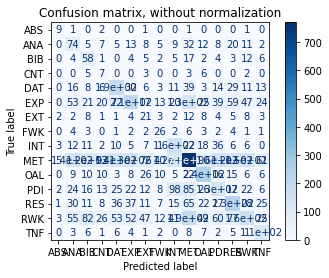

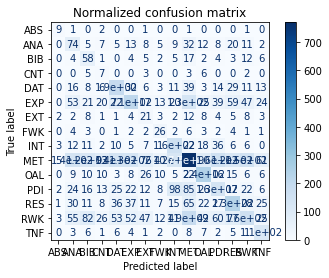

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logmodel, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("TFIDF_LOGISTIC.xlsx")

MULTINOMIAL

In [0]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         APR       0.14      0.33      0.19        40
         CLA       0.55      0.44      0.49       290
         CMP       0.40      0.17      0.24       413
         CNT       0.06      0.08      0.07        49
         EMP       0.50      0.75      0.60      2018
         IMP       0.21      0.12      0.16       233
         NOV       0.35      0.45      0.39       174
        NULL       0.58      0.26      0.36      1036
         PNF       0.31      0.35      0.33       226
         REC       0.30      0.55      0.39        66
         SUB       0.34      0.11      0.17       383

    accuracy                           0.46      4928
   macro avg       0.34      0.33      0.31      4928
weighted avg       0.46      0.46      0.43      4928

Accuracy: 0.45921266233766234


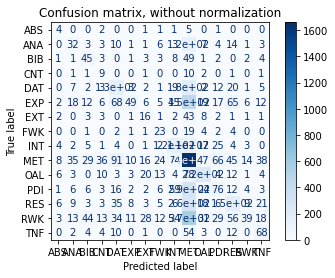

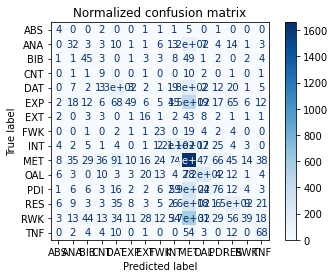

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("TFIDF_NB.xlsx")

RANDOM FOREST

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',class_weight='balanced_subsample')

import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         APR       0.33      0.33      0.33        40
         CLA       0.46      0.44      0.45       290
         CMP       0.38      0.29      0.33       413
         CNT       0.03      0.04      0.03        49
         EMP       0.49      0.67      0.57      2018
         IMP       0.12      0.07      0.09       233
         NOV       0.48      0.47      0.47       174
        NULL       0.51      0.34      0.41      1036
         PNF       0.29      0.29      0.29       226
         REC       0.48      0.50      0.49        66
         SUB       0.20      0.11      0.14       383

    accuracy                           0.44      4928
   macro avg       0.34      0.32      0.33      4928
weighted avg       0.43      0.44      0.43      4928

Accuracy: 0.4448051948051948


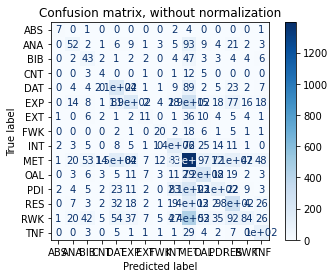

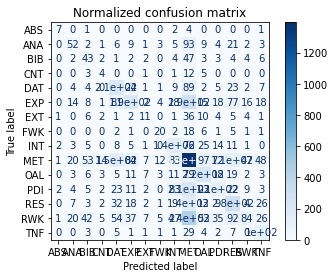

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("TFIDF_RANDOMFOR.xlsx")

SVM

In [0]:
from sklearn import svm
from sklearn.model_selection import train_test_split
# Make a decision tree and train
clf = svm.SVC(class_weight='balanced',decision_function_shape='ovo')
import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         APR       0.43      0.23      0.30        40
         CLA       0.46      0.44      0.45       290
         CMP       0.36      0.35      0.36       413
         CNT       0.08      0.04      0.05        49
         EMP       0.55      0.52      0.53      2018
         IMP       0.16      0.13      0.14       233
         NOV       0.50      0.44      0.47       174
        NULL       0.47      0.54      0.50      1036
         PNF       0.33      0.34      0.34       226
         REC       0.53      0.48      0.51        66
         SUB       0.24      0.30      0.26       383

    accuracy                           0.45      4928
   macro avg       0.37      0.35      0.36      4928
weighted avg       0.45      0.45      0.45      4928

Accuracy: 0.4492694805194805


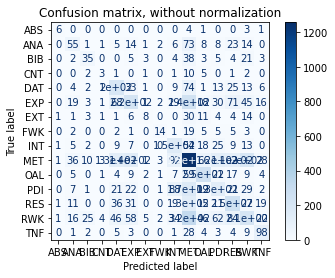

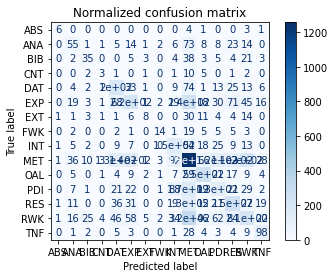

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("TFIDF_SVM.xlsx")

SGD

In [0]:

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         APR       0.17      0.20      0.18        40
         CLA       0.60      0.43      0.50       290
         CMP       0.37      0.36      0.36       413
         CNT       0.03      0.16      0.05        49
         EMP       0.51      0.69      0.59      2018
         IMP       0.21      0.16      0.18       233
         NOV       0.53      0.50      0.51       174
        NULL       0.58      0.21      0.30      1036
         PNF       0.31      0.46      0.37       226
         REC       0.36      0.65      0.46        66
         SUB       0.25      0.07      0.11       383

    accuracy                           0.44      4928
   macro avg       0.35      0.35      0.33      4928
weighted avg       0.47      0.44      0.42      4928

Accuracy: 0.4437905844155844


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


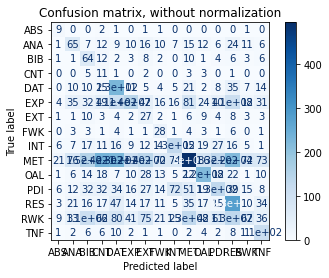

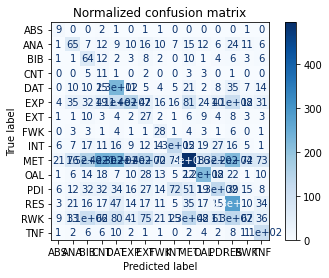

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("TFIDF_SGD.xlsx")

DECISION TREE

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         APR       0.31      0.38      0.34        40
         CLA       0.34      0.35      0.35       290
         CMP       0.22      0.22      0.22       413
         CNT       0.03      0.08      0.04        49
         EMP       0.47      0.45      0.46      2018
         IMP       0.06      0.07      0.06       233
         NOV       0.38      0.44      0.41       174
        NULL       0.40      0.35      0.37      1036
         PNF       0.20      0.21      0.20       226
         REC       0.40      0.53      0.46        66
         SUB       0.10      0.11      0.10       383

    accuracy                           0.35      4928
   macro avg       0.27      0.29      0.27      4928
weighted avg       0.36      0.35      0.35      4928

Accuracy: 0.3455762987012987


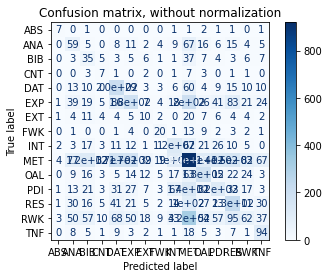

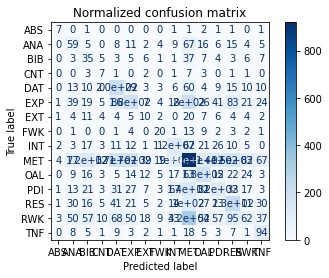

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("TFIDF_DECISION_TREE.xlsx")

In [0]:
y_test=y_test.reset_index()['tag'].tolist()
print(y_test)

['EXP', 'MET', 'INT', 'RWK', 'EXP', 'RWK', 'PDI', 'DAT', 'EXP', 'PDI', 'DAT', 'MET', 'RES', 'PDI', 'ANA', 'INT', 'RWK', 'MET', 'RWK', 'MET', 'RWK', 'PDI', 'INT', 'PDI', 'MET', 'RES', 'OAL', 'RWK', 'MET', 'PDI', 'DAT', 'EXP', 'MET', 'RWK', 'PDI', 'MET', 'RWK', 'DAT', 'EXP', 'MET', 'RWK', 'PDI', 'EXP', 'MET', 'PDI', 'MET', 'RWK', 'MET', 'INT', 'MET', 'RWK', 'RES', 'RWK', 'MET', 'RWK', 'DAT', 'EXP', 'RWK', 'DAT', 'EXP', 'RES', 'RWK', 'EXP', 'RWK', 'PDI', 'MET', 'RWK', 'TNF', 'RWK', 'MET', 'RES', 'RWK', 'TNF', 'INT', 'EXP', 'PDI', 'MET', 'MET', 'EXP', 'MET', 'EXP', 'RWK', 'PDI', 'BIB', 'MET', 'INT', 'OAL', 'MET', 'MET', 'DAT', 'MET', 'OAL', 'MET', 'RES', 'DAT', 'MET', 'EXP', 'MET', 'MET', 'EXP', 'MET', 'TNF', 'INT', 'MET', 'MET', 'MET', 'MET', 'MET', 'MET', 'MET', 'DAT', 'MET', 'RWK', 'MET', 'BIB', 'RWK', 'MET', 'BIB', 'MET', 'MET', 'MET', 'MET', 'RES', 'MET', 'MET', 'CNT', 'CNT', 'BIB', 'INT', 'MET', 'MET', 'RES', 'EXP', 'EXP', 'EXP', 'EXP', 'OAL', 'RES', 'MET', 'EXP', 'INT', 'PDI', 'MET'

------------------------------FOR KFOLD---------------------------------

LOGISTIC

In [0]:
y_test=y_test.reset_index()['tag'].tolist()

from sklearn.linear_model import LogisticRegression

# Make a decision tree and train
clf = LogisticRegression(class_weight='balanced',solver='liblinear')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

Logistic regression
f1 score tfidf 0.450076528485005
recall score tfidf 0.450076528485005
precison score tfidf 0.450076528485005
accuracy score tfidf 0.450076528485005


MULTINOMIAL

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

Logistic regression
f1 score tfidf 0.48168750016812056
recall score tfidf 0.48168750016812056
precison score tfidf 0.48168750016812056
accuracy score tfidf 0.48168750016812056


RANDOM FOREST

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',class_weight='balanced_subsample')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

Logistic regression
f1 score tfidf 0.4467305704174142
recall score tfidf 0.44673057041741426
precison score tfidf 0.44673057041741426
accuracy score tfidf 0.44673057041741426


SVM

In [0]:
from sklearn import svm
clf = svm.SVC(class_weight='balanced',decision_function_shape='ovo')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

DECISION TREE

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
clf = DecisionTreeClassifier()

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

Logistic regression
f1 score tfidf 0.3652317239487084
recall score tfidf 0.36523172394870845
precison score tfidf 0.36523172394870845
accuracy score tfidf 0.36523172394870845
